In [5]:
import numpy as np
import torch

import librosa
import librosa.display
import matplotlib.pyplot as plt

from dataset import KSponSpeechDataset, KSponSpeechDataCollate, to_cuda
from torch.utils.data import DataLoader
from kspon_jamo import n_symbols, text_to_tokens, tokens_to_text

### Dataset

In [6]:
dataset = KSponSpeechDataset(data_dir='dataset')
train_loader = DataLoader(dataset, num_workers=1, shuffle=False, batch_size=16, collate_fn=KSponSpeechDataCollate())
print(train_loader)

In [7]:
!gdown https://drive.google.com/uc?id=1yhLB5sByk_-8m6h-6z4pnSfeLi5QEo7-

Downloading...
From: https://drive.google.com/uc?id=1yhLB5sByk_-8m6h-6z4pnSfeLi5QEo7-
To: /home/gaudio/ste/projects/lectures/aiffel/6.ASR/checkpoint_567000
100%|██████████████████████████████████████| 60.2M/60.2M [00:14<00:00, 4.27MB/s]


### Model Init & Load

In [8]:
from model import Model, refine_tokens

model = Model(input_channels=80, 
              hidden_channels=512, 
              output_channels=n_symbols)
model = model.cuda()
model.eval()

path = 'checkpoint_567000'
checkpoint = torch.load(path, map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])
print('done')

done


### Get data

In [9]:
for batch in train_loader:
    # Batch data to cuda
    batch = to_cuda(batch)
    
    break

### Plot waveform

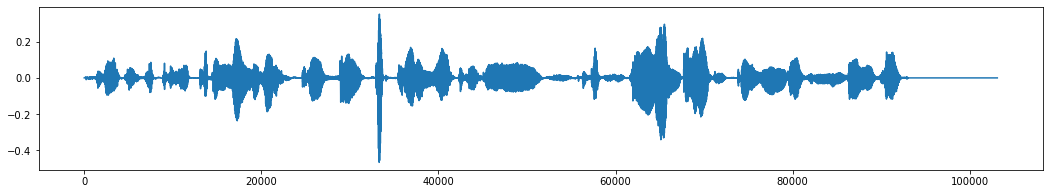

In [10]:
_wav = batch['wav'][6].data.cpu().numpy()

plt.figure(figsize=[18, 3])
plt.plot(_wav)
plt.show()

import IPython.display as ipd
ipd.Audio(_wav, rate=16000)

### Inference and decoding

In [11]:
with torch.no_grad():
    # Get the log-probability and the loss
    log_probs = model(batch['mel'], batch['mel_lengths'])
    
    for i in range(16):
        _log_probs = log_probs.data.cpu().numpy()
        _log_prob = _log_probs[i][:batch['mel_lengths'][i]]

        print(i, 'Ground Truth')
        print(tokens_to_text(batch['text'][i, :batch['text_lengths'][i]].cpu().numpy()))

        print('Prediction')
        tokens_pred = _log_prob.argmax(axis=1)
        tokens_refined = refine_tokens(tokens_pred)
        print(tokens_to_text(tokens_refined))
        print()


0 Ground Truth
아 십 삼 일. 너 십 삼 일날 뭐 한다 했지?
Prediction
아 십 삼이 너 십 삼이을 뭐 한데ㅆ지?

1 Ground Truth
스마트 폰도 잘 모르시고.
Prediction
스마트폰도 잘 머으지고.

2 Ground Truth
너 말이 맞다.
Prediction
넘알 나ㅇㅆ다.

3 Ground Truth
어. 난 말 말다 터질까 봐.
Prediction
어 나 마 말다 터질까 봐.

4 Ground Truth
근데 그렇 그 근까 내 말은 그냥 뭘 해도 좋을 거 같다 이거지.
Prediction
근데 그러 그가 네말안 그냥 뭘 해도 좋을 거 같다 이거지.

5 Ground Truth
이게 진짜 갈까? 막 이런 생각이 그 문득 드는 거야 그게. 근까 일 년 계약이 있고 이 년 계약이 있는데, 이제
Prediction
그게 진짜 갈까 마 이언생강ㅆ어. 그 무뜩 드는 거 거게 근까 일 년계학 있고 이연 격 있는데 이제

6 Ground Truth
이게 진짜 갈까? 막 이런 생각이 그 문득 드는 거야 그게. 근까 일 년 계약이 있고 이 년 계약이 있는데, 이제
Prediction
그게 진짜 갈까 마 이언생강ㅆ어. 그 무뜩 드는 거 거게 근까 일 년계학 있고 이연 격 있는데 이제

7 Ground Truth
아니면 진짜 크리스마스 분위기 나는 데로 갈래?
Prediction
아니면 진짜 크리스마스 본위기 낭ㅆ는데로 갈ㄹ?

8 Ground Truth
아니면 진짜 크리스마스 분위기 나는 데로 갈래?
Prediction
아니면 진짜 크리스마스 본위기 낭ㅆ는데로 갈ㄹ?

9 Ground Truth
어느 일이건 쉬운 건 없는 거 같애.
Prediction
어는 이이건 쉬운건 없는 거 같애.

10 Ground Truth
근데 거기도 크지 않나 공덕 그쪽도?
Prediction
근데 거기도 크지 않나 공ㅇ도그쩍도?

11 Ground Truth
그렇잖 통계학과 문과일걸? 그래?
Prediction
그렇자. 통계하과 문과일걸? 그래.

12 